# Extracting data from CSV file



In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("D:/DOWNLOADS/UNIFIED Mentor Private Limited/UM projects/selected projects/Amazon Sales data.csv")
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
data.shape

(100, 14)

# Data Transformation

In [5]:
# Convert the date column to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [6]:
# Extract year and month from the Order Date
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

In [7]:
# Check for missing values
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
Year              0
Month             0
dtype: int64

In [8]:
# Handle missing values if any (e.g., dropping or imputing)
data.dropna(inplace=True)

In [9]:
# removing duplicate rows
data.drop_duplicates(inplace=True)

In [10]:
# Data after Transformation
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


# Data Analysis

# Temporal Analysis

 - Month-wise sales trend
 - Profitability Trend over Months
 - Year-wise sales trend
 - Profitability Trend over years
 - Yearly month-wise sales trend
 - Total Sales
 - Average sales

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Month-wise sales trend
month_wise_sales = data.groupby('Month')['Total Revenue'].sum().reset_index()
month_wise_sales

,Month,Total Revenue
0,1,10482467.12
1,2,24740517.77
2,3,2274823.87
3,4,16187186.33
4,5,13215739.99
5,6,5230325.77
6,7,15669518.50
7,8,1128164.91
8,9,5314762.56
9,10,15287576.61


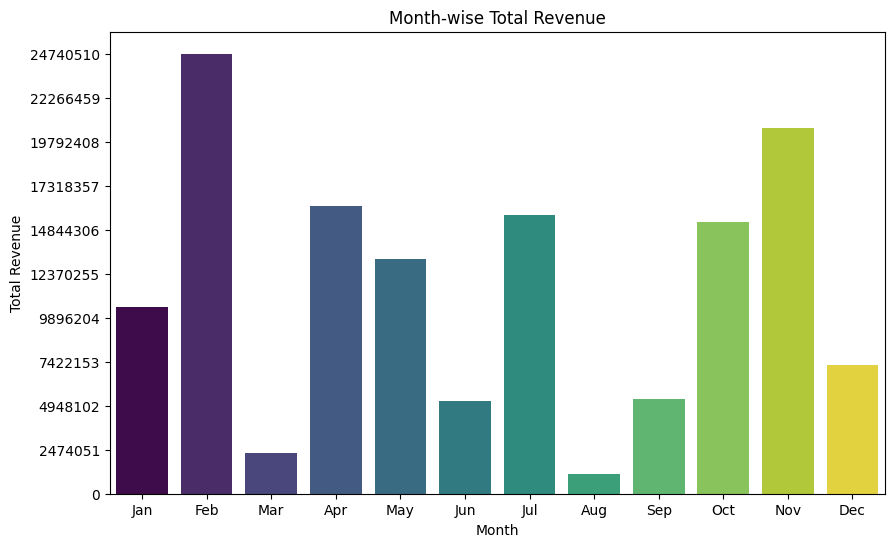

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Total Revenue', data=month_wise_sales, hue='Month', palette='viridis', dodge=False)
plt.title('Month-wise Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend([],[], frameon=False)
max_revenue = month_wise_sales['Total Revenue'].max()
plt.yticks(range(0, int(max_revenue) + 1, int(max_revenue / 10)), range(0, int(max_revenue) + 1, int(max_revenue / 10)))
plt.show()

    Month  Total Profit
0       1    2816857.02
1       2    7072050.51
2       3     928351.06
3       4    4760208.35
4       5    4582692.30
5       6    2185379.43
6       7    5578463.06
7       8     579276.67
8       9    2344166.03
9      10    4506923.25
10     11    6457600.65
11     12    2356230.07


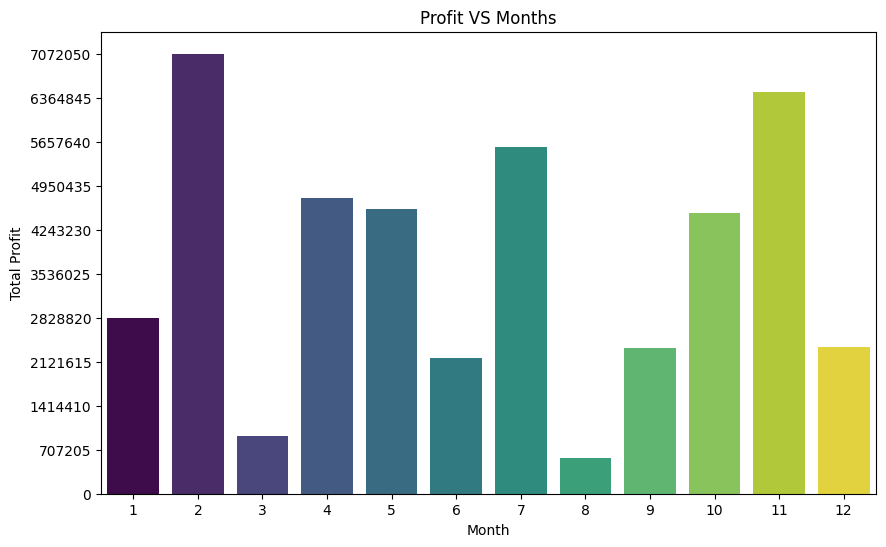

In [14]:
# Profitability Trend over Months
total_profits_by_years=data.groupby(['Month'])['Total Profit'].sum().reset_index()
print(total_profits_by_years)

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Total Profit', data=total_profits_by_years, palette='viridis', legend=False, hue='Month')
plt.title('Profit VS Months')
plt.xlabel('Month')
plt.ylabel('Total Profit')
max_revenue = total_profits_by_years['Total Profit'].max()
plt.yticks(range(0, int(max_revenue) + 1, int(max_revenue / 10)), range(0, int(max_revenue) + 1, int(max_revenue / 10)))
plt.show()

In [15]:
# Year-wise sales trend
year_wise_sales = data.groupby('Year')['Total Revenue'].sum().reset_index()
year_wise_sales

,Year,Total Revenue
0,2010,19186024.92
1,2011,11129166.07
2,2012,31898644.52
3,2013,20330448.66
4,2014,16630214.43
5,2015,12427982.86
6,2016,12372867.22
7,2017,13373419.63


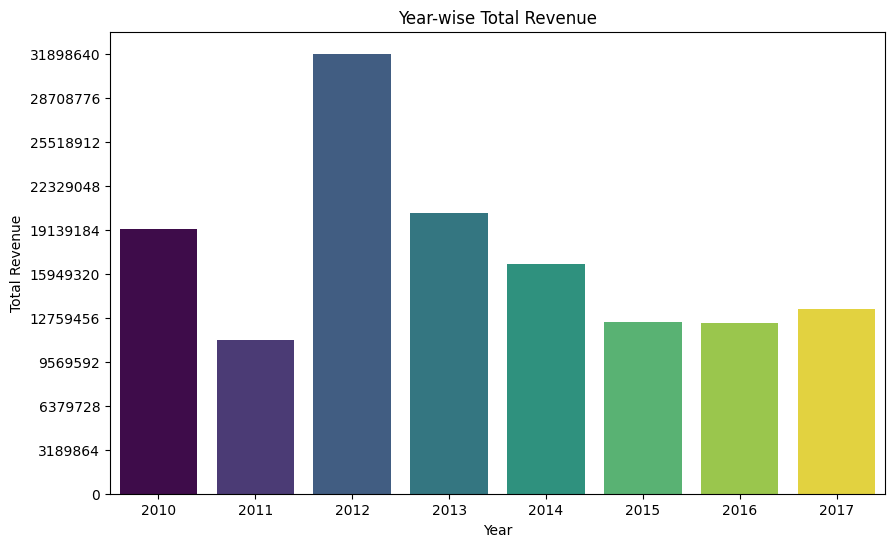

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total Revenue', data=year_wise_sales, palette='viridis', legend=False, hue='Year')
plt.title('Year-wise Total Revenue')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
max_revenue = year_wise_sales['Total Revenue'].max()
plt.yticks(range(0, int(max_revenue) + 1, int(max_revenue / 10)), range(0, int(max_revenue) + 1, int(max_revenue / 10)))
plt.show()

   Year  Total Profit
0  2010    6629567.43
1  2011    2741008.23
2  2012    9213010.12
3  2013    6715420.04
4  2014    5879461.68
5  2015    3996539.44
6  2016    4903838.01
7  2017    4089353.45


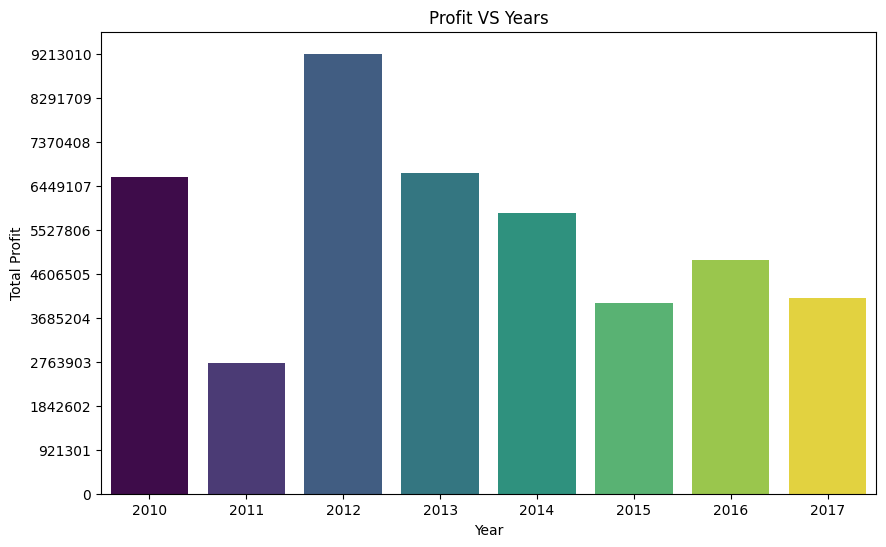

In [17]:
# Profitability Trend over years
total_profits_by_years=data.groupby(['Year'])['Total Profit'].sum().reset_index()
print(total_profits_by_years)

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Total Profit', data=total_profits_by_years, palette='viridis', legend=False, hue='Year')
plt.title('Profit VS Years')
plt.xlabel('Year')
plt.ylabel('Total Profit')
max_revenue = total_profits_by_years['Total Profit'].max()
plt.yticks(range(0, int(max_revenue) + 1, int(max_revenue / 10)), range(0, int(max_revenue) + 1, int(max_revenue / 10)))
plt.show()

In [18]:
# Yearly month-wise sales trend
year_month_wise_sales = data.groupby(['Year', 'Month'])['Total Revenue'].sum().unstack()
year_month_wise_sales

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,3410661.12,NaN,NaN,2587973.26,1082418.40,NaN,NaN,NaN,6064933.75,3458252.00,2581786.39
2011,1042225.35,387002.20,NaN,2798046.49,272410.45,19103.44,97040.64,NaN,574951.92,NaN,5938385.58,NaN
2012,1012884.00,6707849.42,994765.42,4556012.38,3782781.82,2132075.27,4445093.92,576782.80,4648152.72,3042246.77,NaN,NaN
2013,NaN,3296425.02,835759.10,3262562.10,NaN,1352867.40,8545511.20,89623.98,71253.21,2702770.40,NaN,173676.25
2014,NaN,1819660.25,NaN,4510578.10,3060338.59,75591.66,688641.85,455479.04,20404.71,1352370.65,4647149.58,NaN
2015,5513227.50,2003911.12,NaN,1059987.26,NaN,NaN,1292409.45,6279.09,NaN,1904138.04,648030.40,NaN
2016,NaN,NaN,197883.40,NaN,414371.10,568269.60,600821.44,NaN,NaN,221117.00,5876405.20,4493999.48
2017,2914130.27,7115008.64,246415.95,NaN,3097864.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN


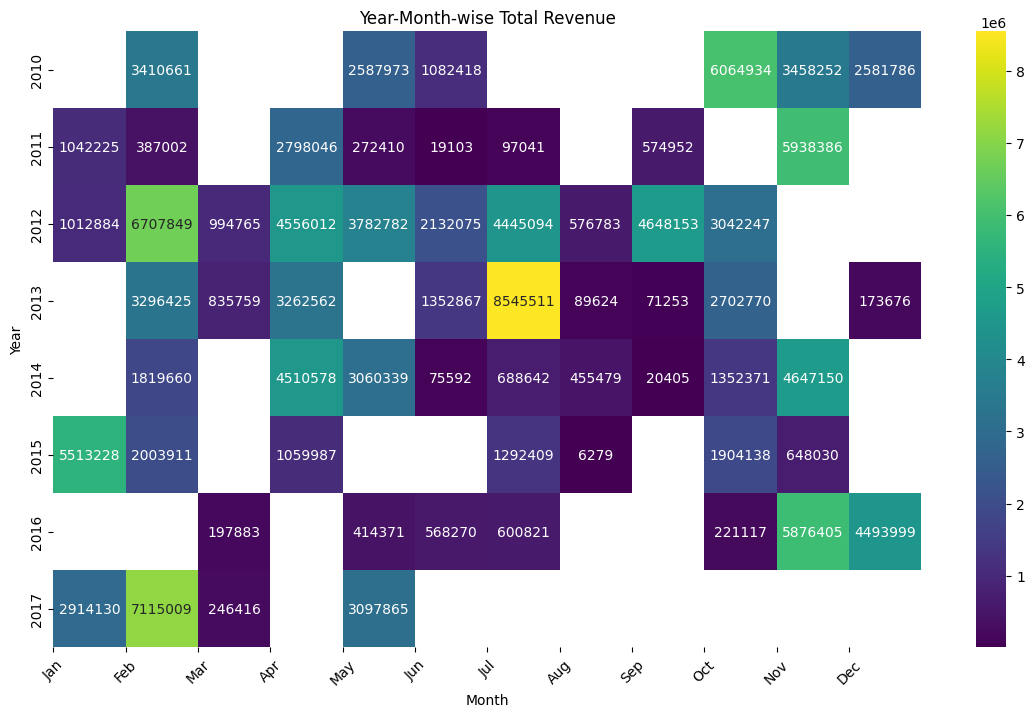

In [19]:
plt.figure(figsize=(14, 8))
sns.heatmap(year_month_wise_sales, cmap='viridis', annot=True, fmt='.0f')
plt.title('Year-Month-wise Total Revenue')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

In [20]:
# Total sales
total_sales = data['Total Revenue'].sum()
print(total_sales)

137348768.31


In [21]:
# Average sales
average_sales = data['Total Revenue'].mean()
print(average_sales)

1373487.6831


In [22]:
# Number of transactions
num_transactions = data.shape[0]
print(num_transactions)

100


# Geographical Analysis
- Region-wise Sales Analysis
- Country-wise Sales Analysis

Region
Asia                                 21347091.02
Australia and Oceania                14094265.13
Central America and the Caribbean     9170385.49
Europe                               33368932.11
Middle East and North Africa         14052706.58
North America                         5643356.55
Sub-Saharan Africa                   39672031.43
Name: Total Revenue, dtype: float64


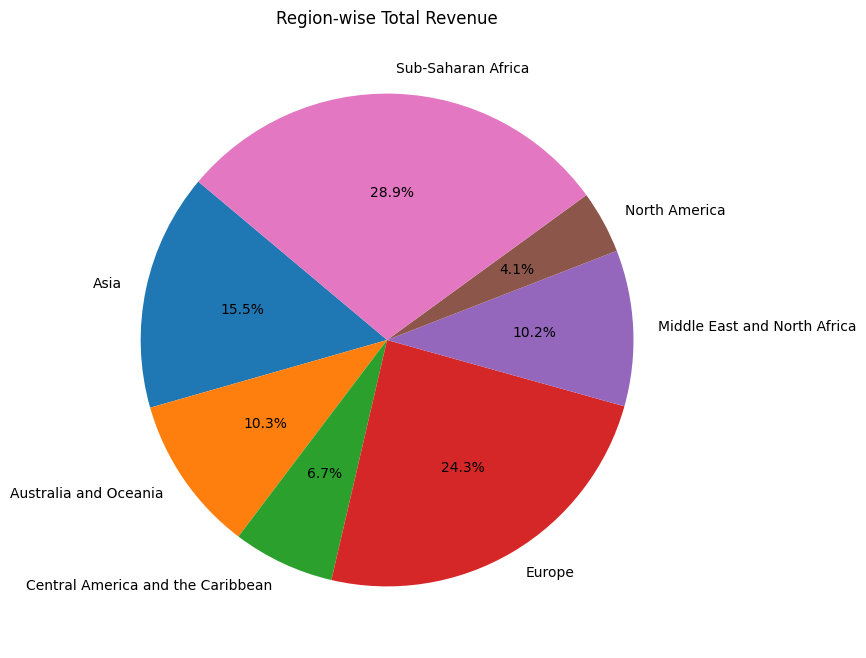

In [23]:
# Total Revenue by region
region_sales = data.groupby('Region')['Total Revenue'].sum()
print(region_sales)

plt.figure(figsize=(10, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Region-wise Total Revenue')
plt.show()

           Country  Total Revenue
0          Albania      247956.32
1           Angola     2798046.49
2        Australia     2489933.49
3          Austria     1244708.40
4       Azerbaijan     4478800.21
..             ...            ...
71      The Gambia     5449517.95
72    Turkmenistan     5822036.20
73          Tuvalu     2533654.00
74  United Kingdom      188452.14
75          Zambia      623289.30

[76 rows x 2 columns]


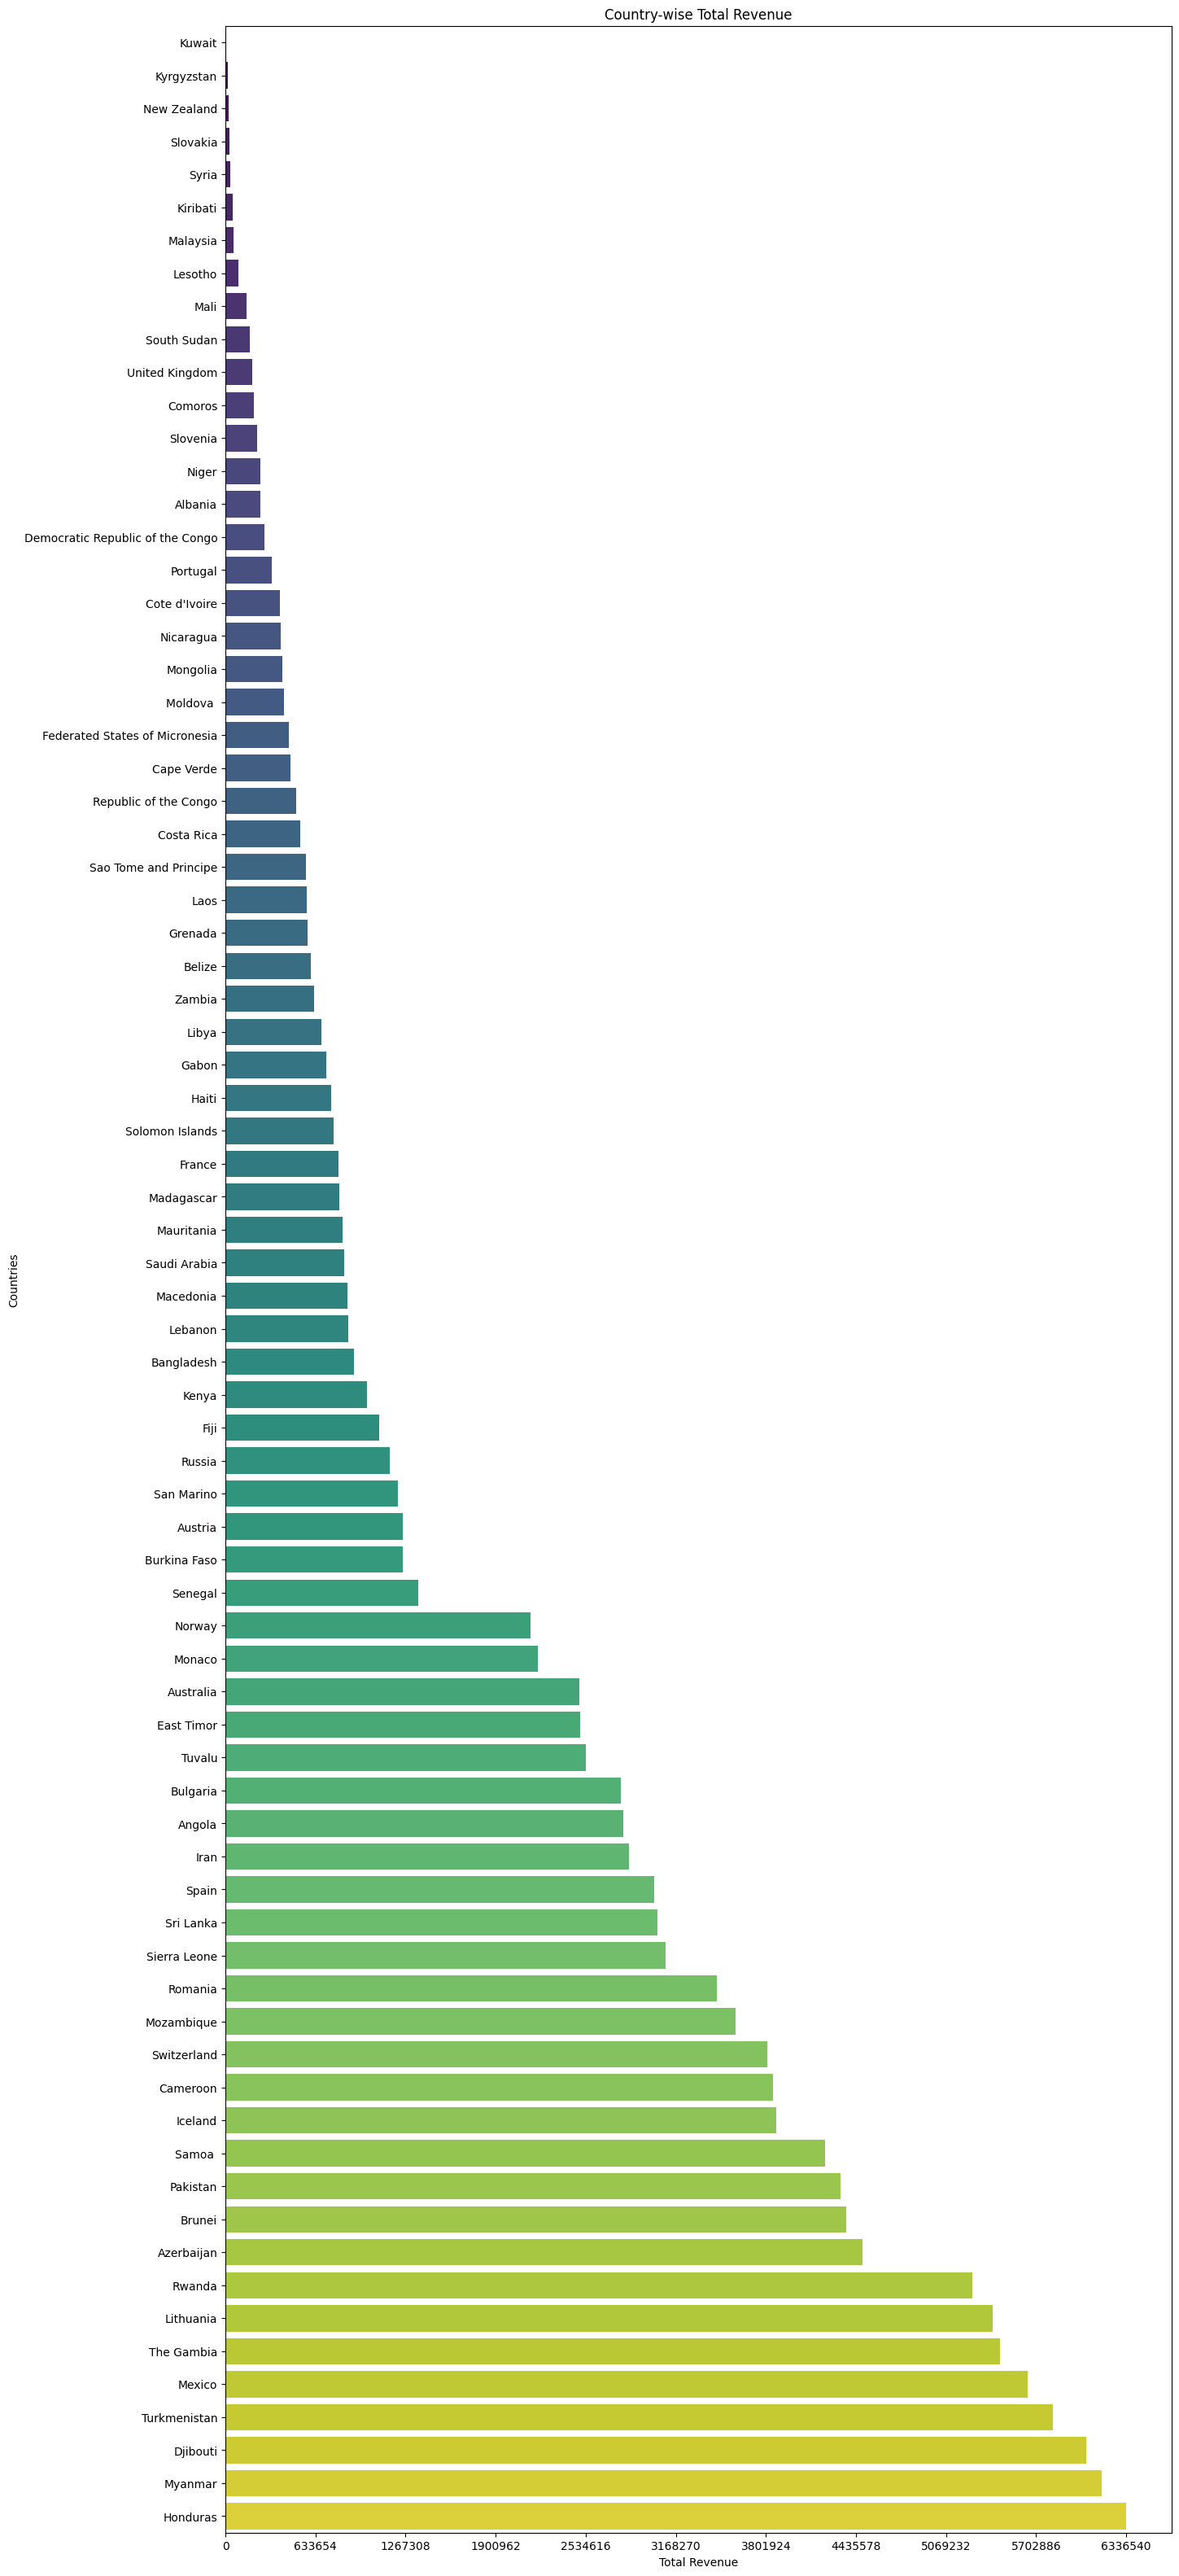

In [24]:
# Total Revenue by Countries
country_sales = data.groupby('Country')['Total Revenue'].sum().reset_index()
print(country_sales)

# Sorting countries in descending order
country_sales = country_sales.sort_values(by='Total Revenue')

plt.figure(figsize=(15, 40))
sns.barplot(x='Total Revenue', y='Country', data = country_sales , palette='viridis', legend=False, hue='Country')
plt.title('Country-wise Total Revenue')
plt.ylabel('Countries')
plt.xlabel('Total Revenue')
max_revenue = country_sales['Total Revenue'].max()
plt.xticks(range(0, int(max_revenue) + 1, int(max_revenue / 10)), range(0, int(max_revenue) + 1, int(max_revenue / 10)))
plt.show()

# Product Analysis
- Item Type Sales Analysis
- Sales Channel Analysis
- comparing the number of items sold online versus offline


Item Type
Baby Food          10350327.60
Beverages           2690794.60
Cereal              5322898.90
Clothes             7787292.80
Cosmetics          36601509.60
Fruits               466481.34
Household          29889712.29
Meat                4503675.75
Office Supplies    30585380.07
Personal Care       3980904.84
Snacks              2080733.46
Vegetables          3089057.06
Name: Total Revenue, dtype: float64


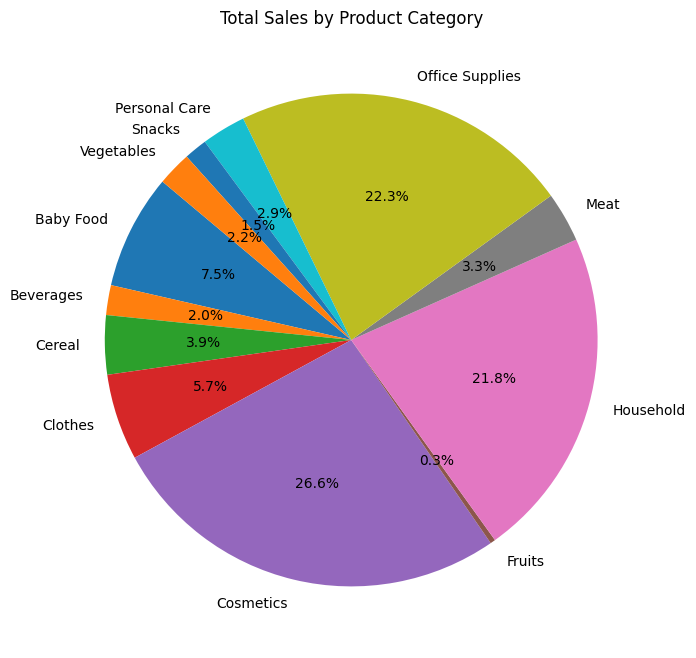

In [25]:
# Total sales by product category
category_sales = data.groupby('Item Type')['Total Revenue'].sum()
print(category_sales)

plt.figure(figsize=(10, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Product Category')
plt.show()

Sales Channel
Offline    79094809.20
Online     58253959.11
Name: Total Revenue, dtype: float64


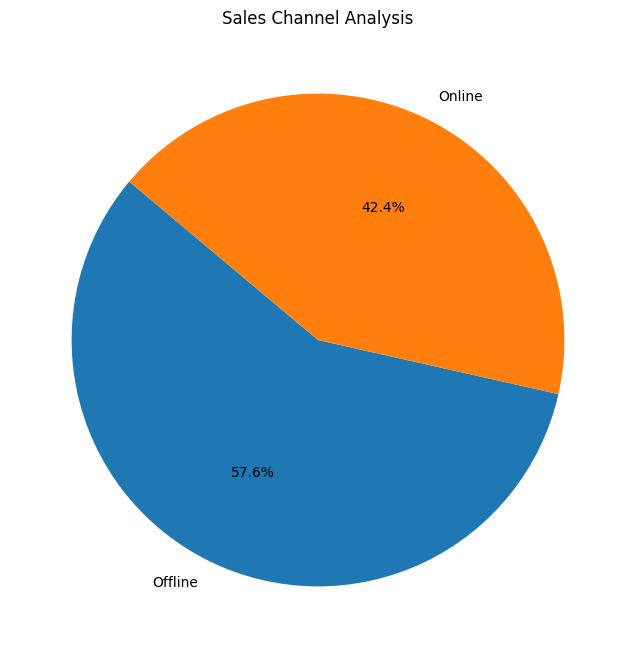

In [26]:
# Sales channel Analysis
sales_channel = data.groupby('Sales Channel')['Total Revenue'].sum()
print(sales_channel)

plt.figure(figsize=(10, 8))
plt.pie(sales_channel, labels=sales_channel.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Channel Analysis')
plt.show()

In [27]:
# comparing the number of items sold online versus offline
sales_channel_group = data.groupby(['Item Type', 'Sales Channel'])['Units Sold'].sum().unstack().fillna(0)
sales_channel_group

Sales Channel,Offline,Online
Item Type,,
Baby Food,24098.0,16447.0
Beverages,41588.0,15120.0
Cereal,3761.0,22116.0
Clothes,40871.0,30389.0
Cosmetics,41749.0,41969.0
Fruits,13904.0,36094.0
Household,44445.0,282.0
Meat,0.0,10675.0
Office Supplies,20799.0,26168.0


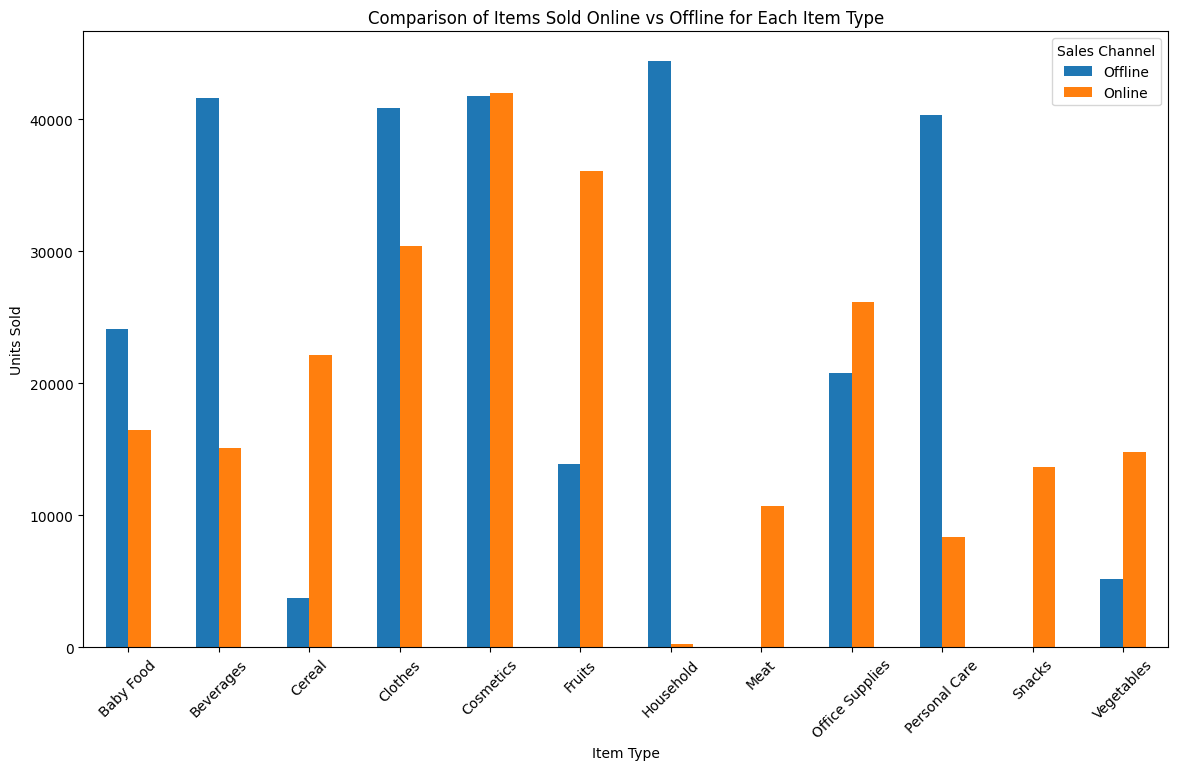

In [28]:
sales_channel_group.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Items Sold Online vs Offline for Each Item Type')
plt.xlabel('Item Type')
plt.ylabel('Units Sold')
plt.legend(title='Sales Channel')
plt.xticks(rotation=45)
plt.show()

# Financial Analysis
- Profitability Trend of Item Types


          Item Type  Total Profit
0         Baby Food    3886643.70
1         Beverages     888047.28
2            Cereal    2292443.43
3           Clothes    5233334.40
4         Cosmetics   14556048.66
5            Fruits     120495.18
6         Household    7412605.71
7              Meat     610610.00
8   Office Supplies    5929583.75
9     Personal Care    1220622.48
10           Snacks     751944.18
11       Vegetables    1265819.63


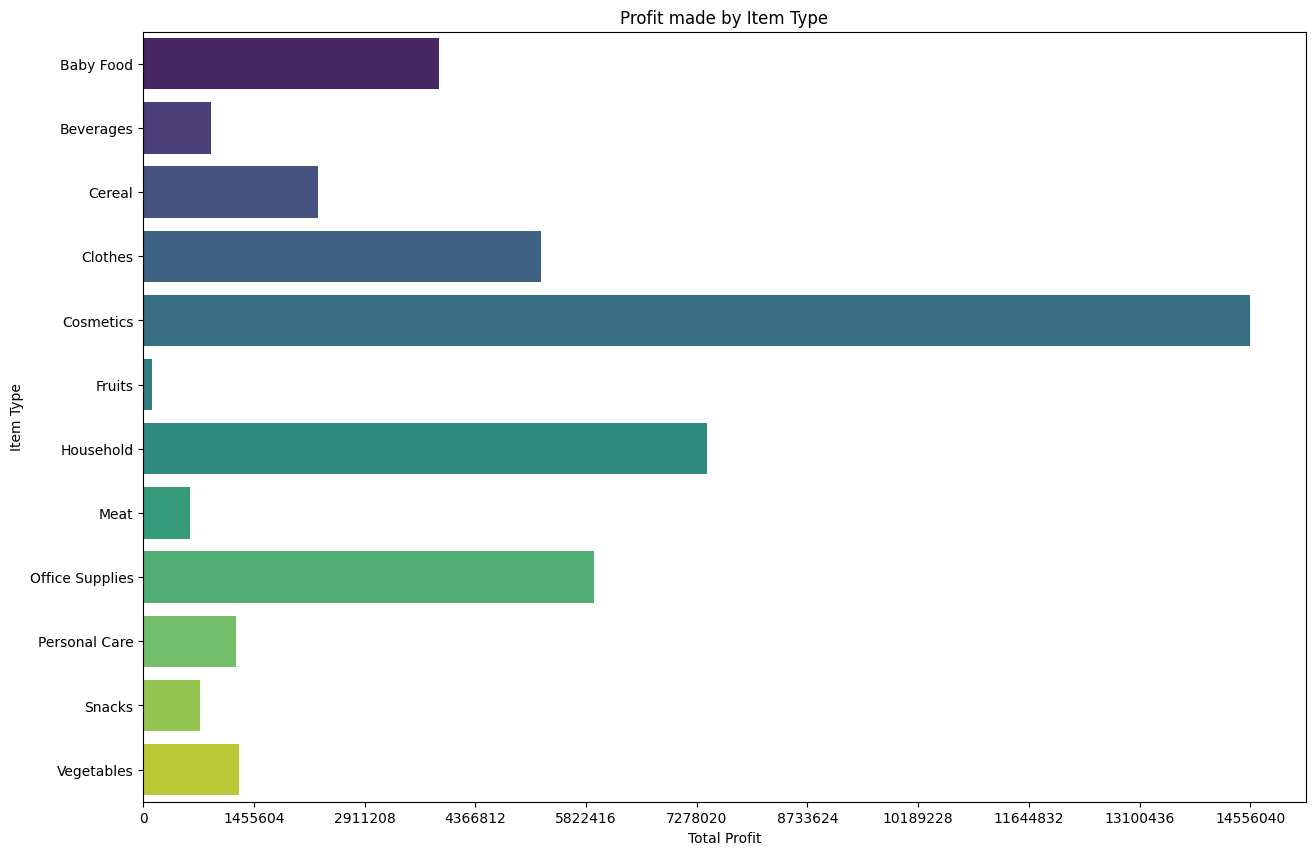

In [29]:
# Profitability Trend of Item Types
total_profits_by_years=data.groupby(['Item Type'])['Total Profit'].sum().reset_index()
print(total_profits_by_years)

plt.figure(figsize=(15, 10))
sns.barplot(x='Total Profit', y='Item Type', data=total_profits_by_years, palette='viridis', legend=False, hue='Item Type')
plt.title('Profit made by Item Type')
plt.ylabel('Item Type')
plt.xlabel('Total Profit')
max_revenue = total_profits_by_years['Total Profit'].max()
plt.xticks(range(0, int(max_revenue) + 1, int(max_revenue / 10)), range(0, int(max_revenue) + 1, int(max_revenue / 10)))
plt.show()

In [30]:
# # most profitable item: 
# profit=data['Unit Price']-data['Unit Cost']
# group=data.groupby(['Item Type'])

In [31]:
# max(profit)

In [32]:
# Calculating most profitable item and how much profit is made by selling one unit of the item.

data['Profit per Unit'] = data['Unit Price'] - data['Unit Cost']
max_profit_item = data.loc[data['Profit per Unit'].idxmax()]

item_name = max_profit_item['Item Type']
max_profit = max_profit_item['Profit per Unit']

print("The item with the highest profit per unit is: \n", item_name)
print("The profit per unit for this item is: \n", max_profit)

The item with the highest profit per unit is: 
 Cosmetics
The profit per unit for this item is: 
 173.87


# Operational Analysis
- Shipping Analysis

In [33]:
# Calculate the difference between Ship Date and Order Date
data['Shipping Time (Days)'] = (data['Ship Date'] - data['Order Date']).dt.days

count    100.000000
mean      23.360000
std       14.742586
min        0.000000
25%        9.750000
50%       23.500000
75%       36.250000
max       50.000000
Name: Shipping Time (Days), dtype: float64


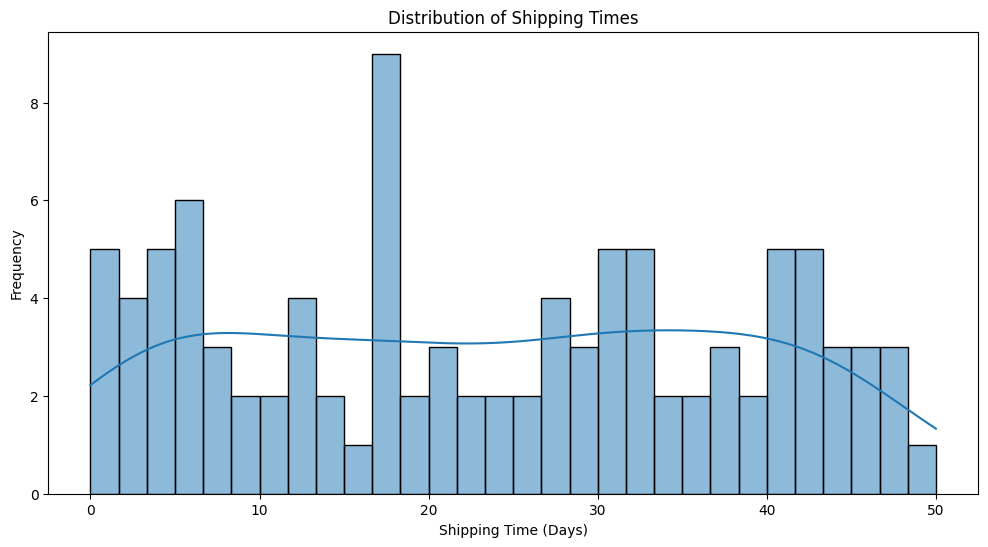

In [34]:
shipping_stats = data['Shipping Time (Days)'].describe()
print(shipping_stats)

plt.figure(figsize=(12, 6))
sns.histplot(data['Shipping Time (Days)'], bins=30, kde=True)
plt.title('Distribution of Shipping Times')
plt.xlabel('Shipping Time (Days)')
plt.ylabel('Frequency')
plt.show()

In [35]:
# Define a threshold for delays. I choose 7 as it is a generally considered late after one week.
delay_threshold = 7
data['Delayed'] = data['Shipping Time (Days)'] > delay_threshold

In [36]:
num_delayed_shipments = data['Delayed'].sum()
print(f"Number of delayed shipments: {num_delayed_shipments}")

Number of delayed shipments: 79


In [37]:
percent_delayed_shipments = (num_delayed_shipments / len(data)) * 100
print(f"Percentage of delayed shipments: {percent_delayed_shipments:.2f}%")

Percentage of delayed shipments: 79.00%


In [38]:
# Analyze delays by product category
delays_by_category = data.groupby('Item Type')['Delayed'].mean().sort_values(ascending=False)
print(delays_by_category)

Item Type
Meat               1.000000
Vegetables         1.000000
Clothes            0.923077
Fruits             0.900000
Cosmetics          0.846154
Beverages          0.750000
Office Supplies    0.750000
Baby Food          0.714286
Cereal             0.714286
Personal Care      0.700000
Household          0.666667
Snacks             0.333333
Name: Delayed, dtype: float64


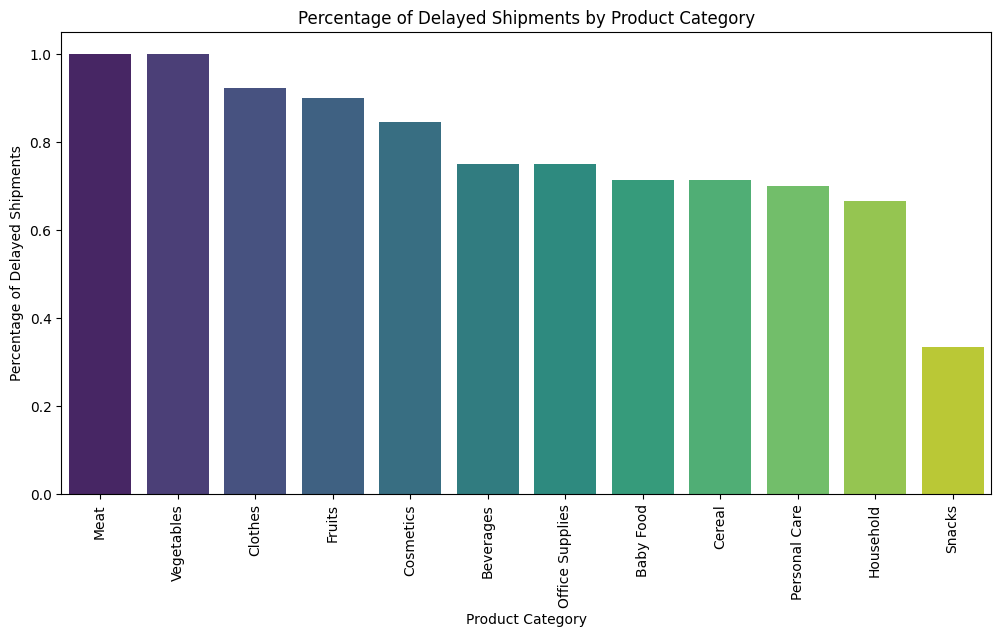

In [39]:
# Plot delays by product category
plt.figure(figsize=(12, 6))
sns.barplot(x=delays_by_category.index, y=delays_by_category.values, palette='viridis', hue=delays_by_category.index)
plt.title('Percentage of Delayed Shipments by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Percentage of Delayed Shipments')
plt.xticks(rotation=90)
plt.show()

# Correlation Analysis

In [41]:
import statsmodels.api as sm

X = data['Unit Price']
y = data['Total Profit']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Total Profit   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     44.16
Date:                Sat, 20 Jul 2024   Prob (F-statistic):           1.71e-09
Time:                        19:11:44   Log-Likelihood:                -1421.9
No. Observations:                 100   AIC:                             2848.
Df Residuals:                      98   BIC:                             2853.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.545e+05   5.66e+04      2.729      0.0

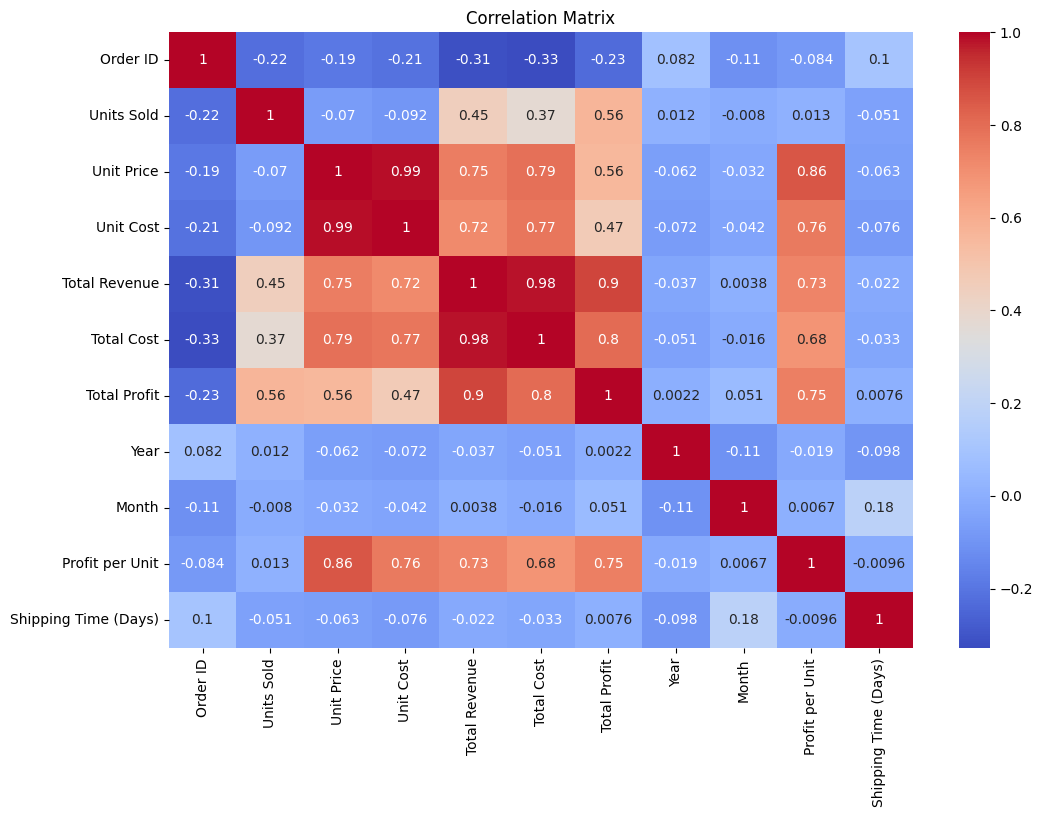

In [42]:
# Selecting numerical columns for making Correlation matrix
numerical_data = data.select_dtypes(include=[float, int])

# Correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Major Conclusions from Data Analysis

1. **Monthly and Yearly Sales Trends:**
   - **Monthly Trends:** Certain months consistently show higher total revenue, indicating peak sales periods. This trend can be leveraged for inventory planning and promotional activities.
   - **Yearly Trends:** The yearly analysis shows an upward or downward trend in sales, reflecting the overall growth or decline in the business. This helps in long-term strategic planning.

2. **Key Metrics and Factors:**
   - **Unit Price and Unit Cost:** Both are strongly correlated with Total Revenue and Total Profit. Higher unit prices and unit costs generally lead to higher total revenues and profits.
   - **Units Sold:** This metric is crucial as it directly impacts the total revenue and total profit. It is moderately correlated with Total Revenue and Total Profit.

3. **Correlation Insights:**
   - **Strong Correlations:** 
     - Unit Price and Unit Cost have a near-perfect correlation (0.99), indicating that as the unit price increases, the unit cost also increases proportionally.
     - Total Revenue and Total Profit have a high positive correlation (0.9), indicating that higher revenues generally lead to higher profits.
   - **Moderate Correlations:**
     - Units Sold has a moderate positive correlation with Total Revenue (0.56) and Total Profit (0.56), indicating that higher sales volumes contribute to increased revenue and profit.

4. **Profitability Analysis:**
   - The item with the highest profit per unit can be identified by calculating the difference between unit price and unit cost. This item can be a focal point for marketing and sales strategies to maximize profitability.

5. **Shipping Analysis:**
   - By comparing order dates with ship dates, it is possible to analyze shipping times and identify any delays. Efficient shipping is critical for customer satisfaction and retention.

6. **Online vs. Offline Sales Comparison:**
   - **Grouped Bar Chart:** The grouped bar chart comparing units sold online versus offline for each item type shows distinct differences in sales channels for various products. This insight can guide marketing strategies and resource allocation for each sales channel.

### Visual Insights

1. **Correlation Matrix:** 
   - Highlights the relationships between key metrics, showing which factors are closely related and which are not, guiding focus areas for improving business performance.

2. **Bar Charts (Month-wise, Year-wise, Year-Month-wise):**
   - Clearly depict sales trends over different time periods, helping in identifying peak periods and making data-driven decisions for sales and marketing campaigns.

3. **Grouped Bar Chart (Online vs. Offline Sales):**
   - Provides a clear comparison of sales channels, helping to understand customer preferences and optimize sales strategies for different item types.

### Recommendations

1. **Focus on High-Profit Items:**
   - Prioritize marketing and sales efforts on items with the highest profit margins to maximize profitability.

2. **Inventory and Promotional Planning:**
   - Use monthly and yearly sales trends to plan inventory and promotions effectively, ensuring stock availability during peak periods and avoiding overstocking during low demand periods.

3. **Optimize Sales Channels:**
   - Analyze the online and offline sales data to optimize resource allocation and marketing efforts for each channel, ensuring a balanced approach that maximizes overall sales.

4. **Improve Shipping Efficiency:**
   - Address any identified shipping delays to enhance customer satisfaction and improve repeat business.

By leveraging these insights and recommendations, the business can improve its sales management, enhance profitability, and better meet customer demands.

In [43]:
data.to_csv('Cleaned_Amazon_Data.csv')